In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Sample multiple data points
num_samples = 100
a_values = np.random.randint(0, 100, num_samples)
b_values = 3 * (a_values**2) + 4

a_tensors = torch.tensor(a_values, dtype=torch.float32).view(-1, 1)
b_tensors = torch.tensor(b_values, dtype=torch.float32).view(-1, 1)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.p1 = nn.Parameter(torch.tensor([1.0], requires_grad=True))  # starting closer to 3
        self.p2 = nn.Parameter(torch.tensor([2.0], requires_grad=True))  # starting at 2
        self.p3 = nn.Parameter(torch.tensor([1.0], requires_grad=True))  # starting closer to 4

    def forward(self, x):
        return self.p1 * x**self.p2 + self.p3

model = Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Using Adam optimizer with a higher learning rate
epochs = 5_000_000 # set it higher if you have more complicated function

loss_values = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(a_tensors)  
    loss = criterion(outputs, b_tensors)  

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss for visualization
    loss_values.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

final_parameters = model.p1.item(), model.p2.item(), model.p3.item()
print(loss_values[-1])
print(final_parameters)

In [111]:
torch.save(model.state_dict(), 'modelbest.pth')

In [112]:
n = 112
num = torch.tensor(n, dtype=torch.float32).view(-1, 1)
output = model(num)
print(f"Predict: {output.item():.4f}")
print(f"Real   : {3*(n**2)+4}")

Predict: 37636.0000
Real   : 37636


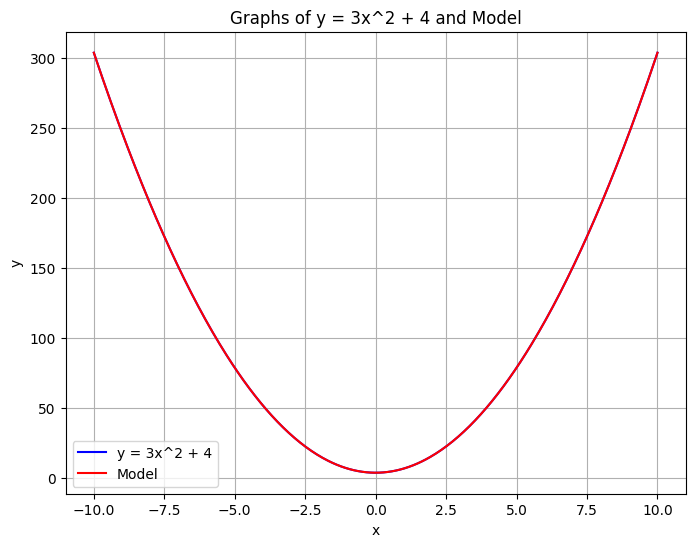

In [114]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 400)  

y1 = 3 * x**2 + 4 # real 
y2 = model.p1.item() * x**model.p2.item() + model.p3.item() # what model thinks real

# create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='y = 3x^2 + 4', color='blue')
plt.plot(x, y2, label='Model', color='red')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graphs of y = 3x^2 + 4 and Model")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()